In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from icecream import ic
import random


In [8]:
antiTBamp = pd.read_excel('antiTBamp-prod.xlsx')
additional = pd.read_csv('grampa.csv')
negatives = pd.read_csv('uniprotkb_length_TO_20_NOT_antimicrobia_2025_02_11.tsv', sep='\t')

antitbpred = pd.read_csv('antitbpred.csv', header=None) 
dbaasp = pd.read_csv('dbaasp.csv')
dramp = pd.read_excel('dramp.xlsx')

In [9]:
tuberculosis_rows = dramp[dramp['Target_Organism'].str.contains('tuberculosis', na=False)]


In [10]:
dramp_new = []
for x in dramp['Sequence']:
    if x in list(antiTBamp['Sequences']):
        dramp_new.append(x)
        # additional = additional[additional['sequence']!=x]

In [11]:
additional = additional[additional['bacterium']=='M. tuberculosis']
antiTBamp = antiTBamp[~antiTBamp['Sequences'].str.contains('\(')]

In [12]:
additional_new = []
for x in additional['sequence']:
    if x in list(antiTBamp['Sequences']):
        additional_new.append(x)
        # additional = additional[additional['sequence']!=x]
        
antitbpred_new = []
for x in antitbpred[0]:
    if x in antiTBamp['Sequences'].values:
        continue
    else:
        antitbpred_new.append(x)
        


In [13]:
dbaasp_new = []
for x in dbaasp['SEQUENCE']:
    if x in antiTBamp['Sequences'].values:
        continue
    else:
        dbaasp_new.append(x)
        
        

In [14]:
apd3 = ['LLGDFFRKSKEKIGKEFKRIVQRIKDFLRNLVPRTES',
        'GRDYRTCLTIVQKLKKMVDKPTQRSVSNAATRVCRTGRSRWRDVCRNFMRRYQSRVTQGLVAGETAQQICEDLR',
        'QNERYEKFLRQHYDAKPNGRDDRYCESMMKERKLTSPCKDVNTFIHGTKKNIRAICGKKGSPYGENFRISNSPFQITTCTHSGASPRPPCGYRAFKDFRYIVIACEDGWPVHFDESFISP',
        'KPKGMTSSQWFKIQHMQPSPQACNSAMKNINKHTKRCKDLNTFLHEPFSSVAATCQTPKIACKNGDKNCHQSHGAVSLTMCKLTSGKYPNCRYKEKRQNKSYVVACKPPQKKDSQQFHLVPVHLDRVL',
        'FISQIISTARI',
        'GLRRLFADQLVGRRNI',
        'SCTTCVCTCSCCTT',
        'LIAGLAANFLPQILCKIARKC',
        'LPFFLLSLIPSAISAIKKI',
        'FWGFLGKLAMKAVPSLIGGNKSSSK',
        'VPSLPLVPLG',
        'ACVNQCPDAIDRFIVKDKGCHGVEKKYYKQVYVACMNGQHLYCRTEWGGPCQL',
        'RECRIGNGQCKNQCHENEIRIAYCIRPGTHCCLQQ',
        'KKCWNGGRCRKKCKENEKPIGYCRNGKKCCVN',
        'VMWCYVFGYGFNCAVWV',   
        ]


In [15]:
amp = antiTBamp['Sequences'].to_list() + additional_new + antitbpred_new + dbaasp_new + dramp_new + apd3

In [16]:
amp = list({seq.lower(): seq for seq in amp}.values())        



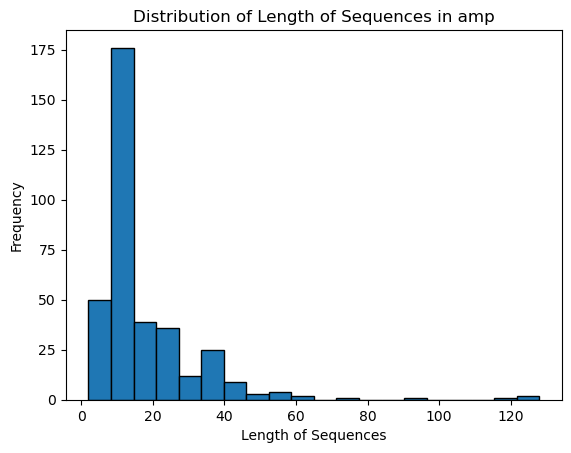

min: 2
max: 128


In [27]:
lengths = [len(seq) for seq in amp]
plt.hist(lengths, bins=20, edgecolor='black')
plt.xlabel('Length of Sequences')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Sequences in amp')
plt.show()
print('min:', min(lengths))
print('max:', max(lengths))

In [51]:
no_amp60 = pd.read_csv('/mnt/storageG1/lwang/Projects/TB-AMP-design/uniprotkb_accession_A0A0B4J2F0_OR_access_2025_02_26.tsv', sep='\t')
no_amp = pd.read_csv('/mnt/storageG1/lwang/Projects/TB-AMP-design/uniprotkb_length_TO_20_NOT_antimicrobia_2025_02_11.tsv', sep='\t')
no_amp_additional = pd.read_csv('/mnt/storageG1/lwang/Projects/TB-AMP-design/uniprotkb_accession_A2RU14_OR_accession_2025_02_26-additional.tsv', sep='\t')

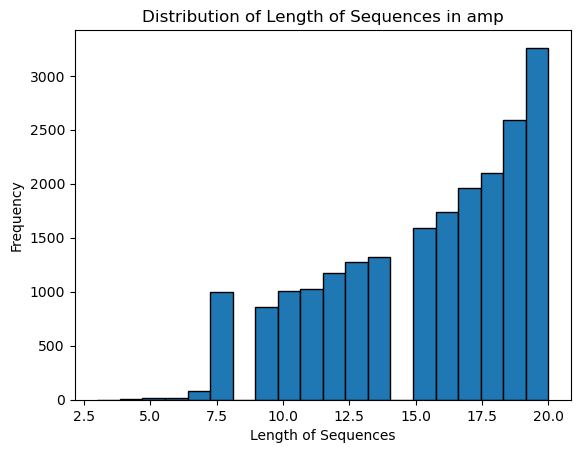

min: 3
max: 20


In [28]:
lengths = [len(seq) for seq in no_amp['Sequence']]
plt.hist(lengths, bins=20, edgecolor='black')
plt.xlabel('Length of Sequences')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Sequences in amp')
plt.show()
print('min:', min(lengths))
print('max:', max(lengths))

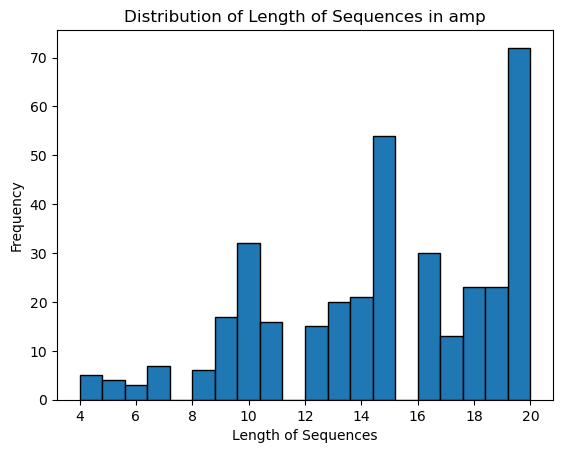

min: 4
max: 20


In [29]:
lengths = [len(seq) for seq in no_amp_list]
plt.hist(lengths, bins=20, edgecolor='black')
plt.xlabel('Length of Sequences')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Sequences in amp')
plt.show()
print('min:', min(lengths))
print('max:', max(lengths))

### generating negatives

In [60]:
# amp = [seq for seq in amp if '-' not in seq and 'not available' not in seq and 'B' not in seq]
amp = [seq for seq in amp if '-' not in seq and 'not available' not in seq]
amp = [seq.strip() for seq in amp]
amp = [seq for seq in amp if seq not in ['XSXXX    X', 'XX', 'XXSSXX', 'XXS']]

In [46]:
amp = [seq.upper() for seq in amp]
unique_letters = set(''.join(amp))
print(unique_letters)
print(len(unique_letters))
x_count = sum('X' in seq for seq in amp)
percentage_x = (x_count / len(amp)) * 100
print(f"Percentage of sequences containing 'X': {percentage_x:.2f}%")

{'N', 'H', 'D', 'R', 'E', 'I', 'G', 'S', 'M', 'C', 'L', 'X', 'F', 'W', 'Y', 'Q', 'T', 'A', 'V', 'P', 'K'}
21
Percentage of sequences containing 'X': 8.52%


In [53]:
no_amp_list_  = no_amp['Sequence'].iloc[0:len(amp)].tolist() 
sequences_of_length_20 = [seq for seq in no_amp_list if len(seq) == 20]
sequences_to_remove = random.sample(sequences_of_length_20, 50)
no_amp_list_ = [seq for seq in no_amp_list_ if seq not in sequences_to_remove]

In [56]:

no_amp_list  = no_amp_list_ + no_amp60['Sequence'].tolist()
# Randomly select the same number of sequences as in amp
selected_no_amp_sequences = random.sample(no_amp_list, len(amp)-10)
selected_no_amp_sequences = selected_no_amp_sequences + no_amp_additional['Sequence'].tolist()
# Substitute 'X' at random locations for 8.52% of the selected sequences
num_sequences_to_modify = int(len(selected_no_amp_sequences) * (percentage_x / 100))

for i in random.sample(range(len(selected_no_amp_sequences)), num_sequences_to_modify):
    seq = list(selected_no_amp_sequences[i])
    num_substitutions = random.randint(3, 5)
    for _ in range(num_substitutions):
        pos = random.randint(0, len(seq) - 1)
        seq[pos] = 'X'
    selected_no_amp_sequences[i] = ''.join(seq)

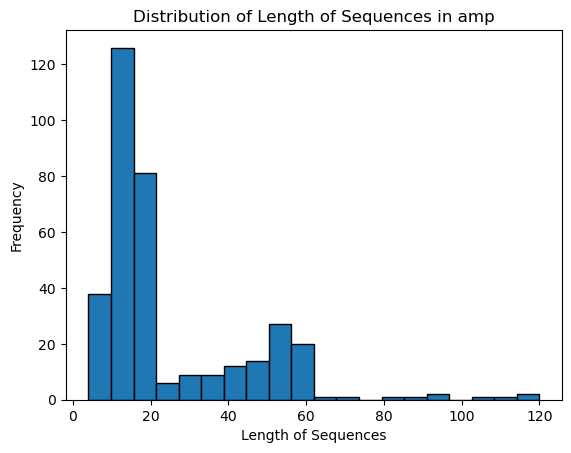

min: 4
max: 120


In [57]:
selected_no_amp_sequences

lengths = [len(seq) for seq in selected_no_amp_sequences]
plt.hist(lengths, bins=20, edgecolor='black')
plt.xlabel('Length of Sequences')
plt.ylabel('Frequency')
plt.title('Distribution of Length of Sequences in amp')
plt.show()
print('min:', min(lengths))
print('max:', max(lengths))

In [61]:
len(amp)

352

In [62]:
len(selected_no_amp_sequences)

352

In [65]:
len(np.ones(len(amp)).tolist())
len(np.zeros(len(selected_no_amp_sequences)).tolist())

352

In [68]:
# no_amp_list  = no_amp['Sequence'].iloc[0:len(amp)].tolist()
all_seq = amp + selected_no_amp_sequences

In [69]:
len(all_seq)

704

In [70]:
df = pd.DataFrame(columns=['Sequences', 'AMP'])
df['Sequences'] = all_seq
df['AMP'] = np.ones(len(amp)).tolist() + np.zeros(len(selected_no_amp_sequences)).tolist()

In [71]:
df.to_csv('all_seq702.csv', index=False)